In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [16]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ..., 
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


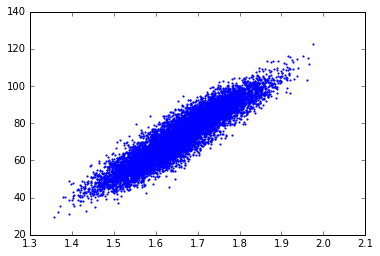

In [17]:
y.shape, tx.shape
print(tx)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(height,weight, marker=".", color='b', s=5)

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [18]:
def compute_cost(y, tx, w):
    """calculate the cost.

    you can calculate the cost by mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    
    #     raise NotImplementedError
    return np.linalg.norm(y-np.dot(tx,w))**2 /(2*y.shape[0])
#     return np.sum((y-np.dot(tx,w))**2) / (2*y.size)

def compute_cost_MAE(y,tx,w):
#     return np.linalg.norm(y-np.dot(tx,w),ord=1)/y.size
    return np.sum(abs(y-np.dot(tx,w))) / y.size

w = np.array([1,2])
compute_cost(y,tx,w)
#compute_cost_MAE(y,tx,w)

2694.4833658870839

# Grid Search

Fill in the function `grid_search()` below:

In [19]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
#     raise NotImplementedError
    for i in range(len(w0)):
        for j in range(len(w1)) :
#             print(np.array([w0[i],w1[j]]).shape) 
            loss[i][j] = compute_cost(y,tx,np.array([w0[i],w1[j]]))
    
    return loss

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.009 seconds


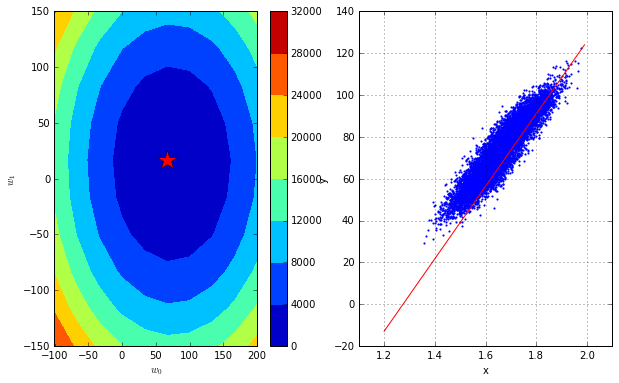

In [21]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [22]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    N = y.size
    e = y - np.dot(tx,w)
    return -1/N * np.dot(tx.T,e)


def compute_gradient_MAE(y,tx,w):
    """Compute the gradient for MAE function"""
    #     MAE = np.sum(abs(y - np.dot(tx,w)))
    # Gradient of MAE is simple. 
    e = y-np.dot(tx,w)
#     grad_w0 = np.sign(e)*-1/y.size
#     grad_w1 = np.sign(e)*-1*x1/y.size
    return np.dot(tx.T,(-1)* np.sign(e))/y.size
    
    
#     raise NotImplementedError
# Test script
# w = np.array([50,10])
# grad = compute_gradient_MAE(y,tx,w)
# print(grad,"\n",np.linalg.norm(grad))
# w = np.array([100,20])
# grad = compute_gradient_MAE(y,tx,w)
# print(grad,"\n",np.linalg.norm(grad))
# tx = np.array([[1,4],[1,5],[1,6]])
# y = np.array([1,3,5])
# print(compute_gradient_MAE(y,tx,w))
# test_x = np.array([[1,4],[1,5],[1,20]])
# test_y = np.array([3,3,5])
tW = np.array([12,23])
te = y - np.matmul(tx,tW)
# print(te)
# print(tx)
# print(np.sign(te))
print(np.matmul(tx.T,np.sign(te)))
compute_gradient_MAE(y,tx,tW)
# compute_gradient(test_y,test_x,tW)

[  1.00000000e+04  -6.82121026e-12]


array([ -1.00000000e+00,   6.82121026e-16])

Please fill in the functions `gradient_descent` below:

In [27]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    min_loss = compute_cost(y,tx,w)
    counter = 0
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        
        # --------------------------- #
        # This part is to compute MSE #
        # --------------------------- #
        grad = compute_gradient(y,tx,w)
        loss = compute_cost(y,tx,w)

        # --------------------------- #
        # This part is to compute MSE #
        # --------------------------- #
#         grad = compute_gradient_MAE(y,tx,w)
#         loss = compute_cost_MAE(y,tx,w)
        
#         raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*grad
#         raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        """
        Interesting here, must we use the isclose?
        """
        if(loss < min_loss): 
            min_loss = loss
            counter = 0
        elif (np.isclose(min_loss,loss)): 
            counter = counter + 1
        else: 
            counter = 0
        
#         print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
#               bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
#         print("counter ",counter)
        if (counter > 100):            
            print("GD stopped for the loss converge to %s" %loss)
            break
            

    return losses, ws
# init_w = np.array([0,0])
# gradient_descent(y,tx,init_w,500,0.25)

Test your gradient descent function through gradient descent demo shown below:

In [28]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent: execution time=0.010 seconds


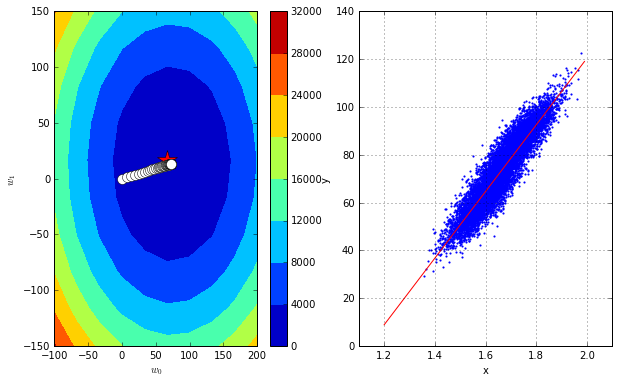

In [29]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [33]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    N = y.shape[0]
    e = y - np.dot(tx,w)
    grad = 0
    for _y,_x in zip(y,tx):
        grad = grad + compute_gradient(_y,_x,w)
    grad = grad / N
    return grad


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    w = initial_w
    ws = []
    losses = []
    for epoch in range(max_epochs):
        # Generate the patch 
        for batch_y,batch_x in batch_iter(y,tx,batch_size):
            grad = compute_stoch_gradient(batch_y,batch_x,w)
            w = w - gamma*grad
        loss = compute_cost(y,tx,w)
        ws.append(w)
        losses.append(loss)
    return losses, ws

In [34]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=6.951 seconds


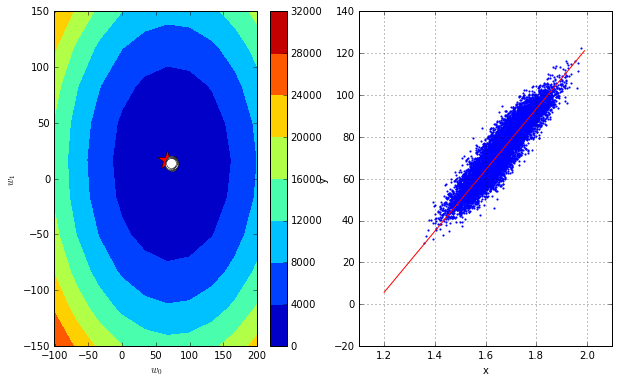

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))